<a href="https://colab.research.google.com/github/MayarQasrawi/Computer-Vision/blob/main/Intro_to_OpenCV_and_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

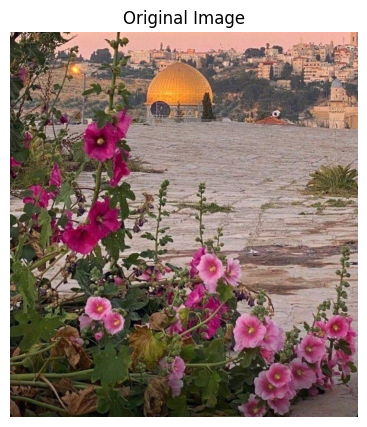

Image shape: (797, 720, 3)


In [3]:
# Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Loading and displaying an image
image = cv2.imread('/content/photo_5913455340324765398_y.jpg')

#defult format is BGR and i want to convert it to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

print("Image shape:", image.shape)



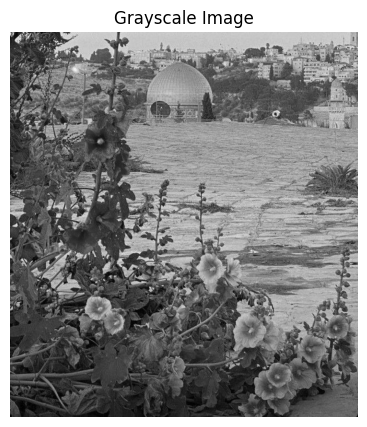

Grayscale image shape: (797, 720)


In [4]:
# 2. Converting to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

print("Grayscale image shape:", gray_image.shape)



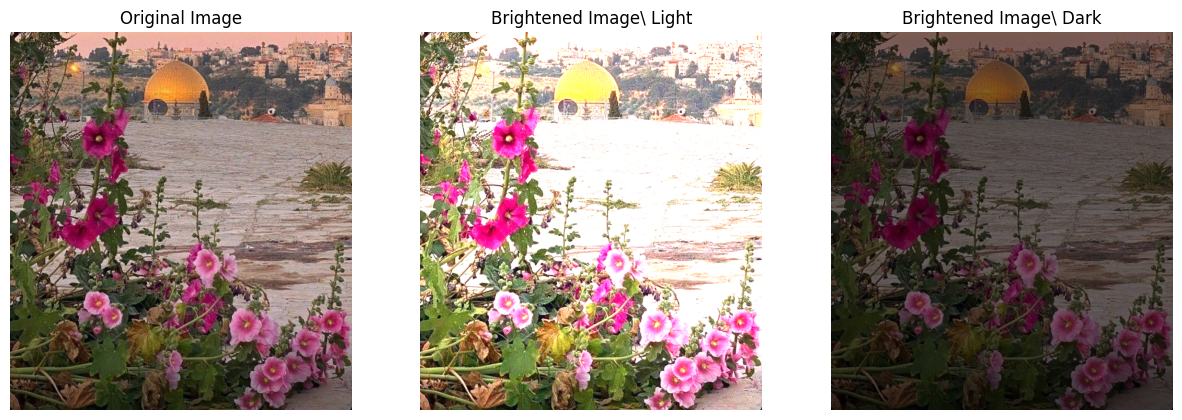

In [22]:
# 3. Point operation: Brightness adjustment
def adjust_brightness(image, factor):
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)
    """Adjusts the brightness of an image using OpenCV's convertScaleAbs function.

  Args:
      image: The input image as a NumPy array.
      factor: A floating-point value that controls the brightness adjustment.
          - Values greater than 1 increase brightness.
          - Values less than 1 decrease brightness.

  Returns:
      The adjusted image as a NumPy array.
 --------------------------------------------------------------------------------------------------------------------------------------------------------------------
  alpha=factor: This parameter controls the scaling factor for the pixel values. A value of factor > 1 scales the pixels brighter, while factor < 1 scales them darker.
beta=0: This parameter is set to 0, indicating that no additional value is added or subtracted to the pixels after scaling.
  """

brightened_image_light = adjust_brightness(image_rgb, 2)
brightened_image_dark = adjust_brightness(image_rgb, 0.5)
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(1,3,2) ,plt.imshow(brightened_image_light) ,plt.title('Brightened Image\ Light'),plt.axis('off')
plt.subplot(1,3,3), plt.imshow(brightened_image_dark), plt.title('Brightened Image\ Dark'), plt.axis('off')
plt.show()



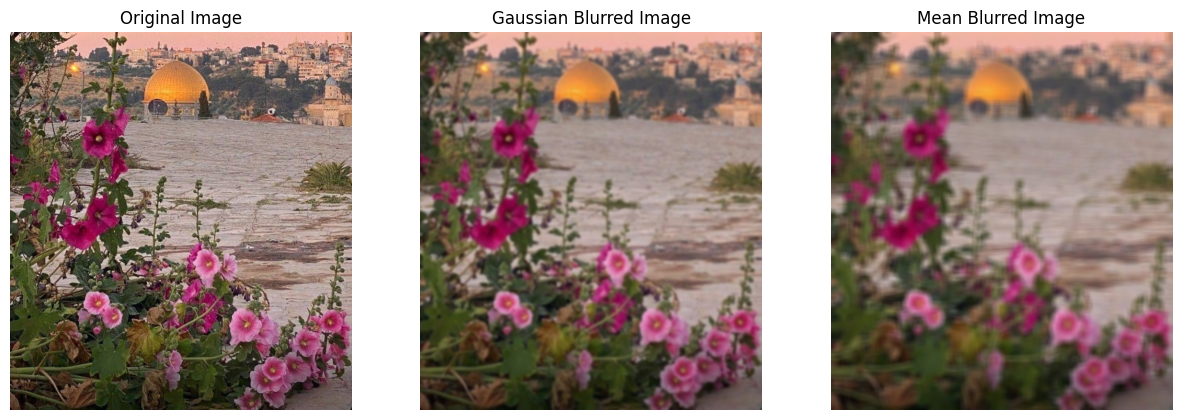

In [30]:
# 4. Local operation: Blurring
blurred_image = cv2.GaussianBlur(image_rgb, (15, 15),0)



Mean= np.ones((15,15),np.float32)/np.power(15,2)
Mean_blur=cv2.filter2D(image_rgb,-1,Mean)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(blurred_image), plt.title('Gaussian Blurred Image'), plt.axis('off')
plt.subplot(133), plt.imshow(Mean_blur), plt.title('Mean Blurred Image'), plt.axis('off')

plt.show()




Original image shape: (797, 720, 3) width*hight= 573840
Flattened image shape: (573840, 3)


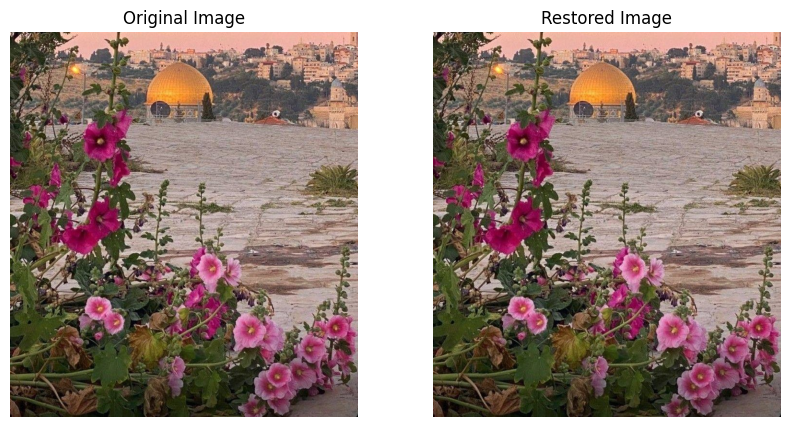

In [32]:
# 6. Reshaping image

'''
flattened_image = image_rgb.reshape(-1, 3):
This line reshapes the image data stored in image_rgb into a flattened format.
image_rgb.reshape(...) calls the reshape method on the image_rgb array.
-1: This tells NumPy to infer the first dimension based on the total number of elements in the array and the second dimension (3).
This essentially flattens the image data, treating all pixels as a single list.
3: This specifies that the second dimension should have a size of 3.
Since RGB images have three color channels (Red, Green, Blue), this ensures each pixel information (RGB values) remains together in the flattened array.
'''
flattened_image = image_rgb.reshape(-1, 3)
print("Original image shape:", image_rgb.shape,"width*hight=",image_rgb.shape[0]*image_rgb.shape[1])
print("Flattened image shape:", flattened_image.shape)

# Reshape back to original dimensions
restored_image = flattened_image.reshape(image_rgb.shape)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(restored_image), plt.title('Restored Image'), plt.axis('off')
plt.show()



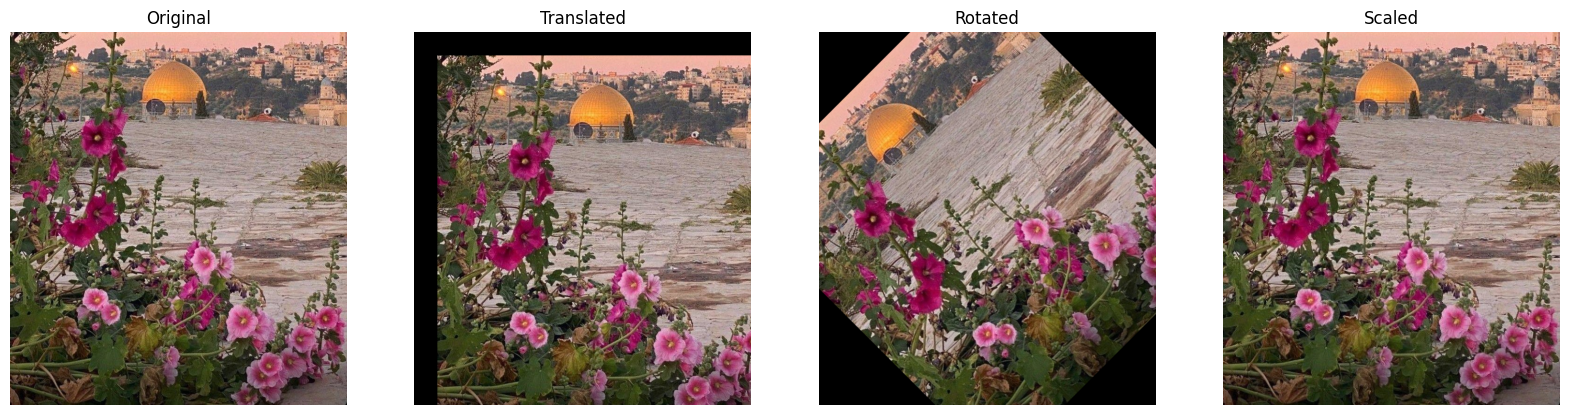

In [8]:
# 7. Pixel position transformations
def translate(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, M, (cols, rows))

def rotate(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def scale(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

# Apply transformations
translated = translate(image_rgb, 50, 50)  # Translate 50 pixels right and down
rotated = rotate(image_rgb, 45)  # Rotate 45 degrees
scaled = scale(image_rgb, 0.5, 0.5)  # Scale to half size

# Display results
plt.figure(figsize=(20, 5))
plt.subplot(141), plt.imshow(image_rgb), plt.title('Original'), plt.axis('off')
plt.subplot(142), plt.imshow(translated), plt.title('Translated'), plt.axis('off')
plt.subplot(143), plt.imshow(rotated), plt.title('Rotated'), plt.axis('off')
plt.subplot(144), plt.imshow(scaled), plt.title('Scaled'), plt.axis('off')
plt.show()

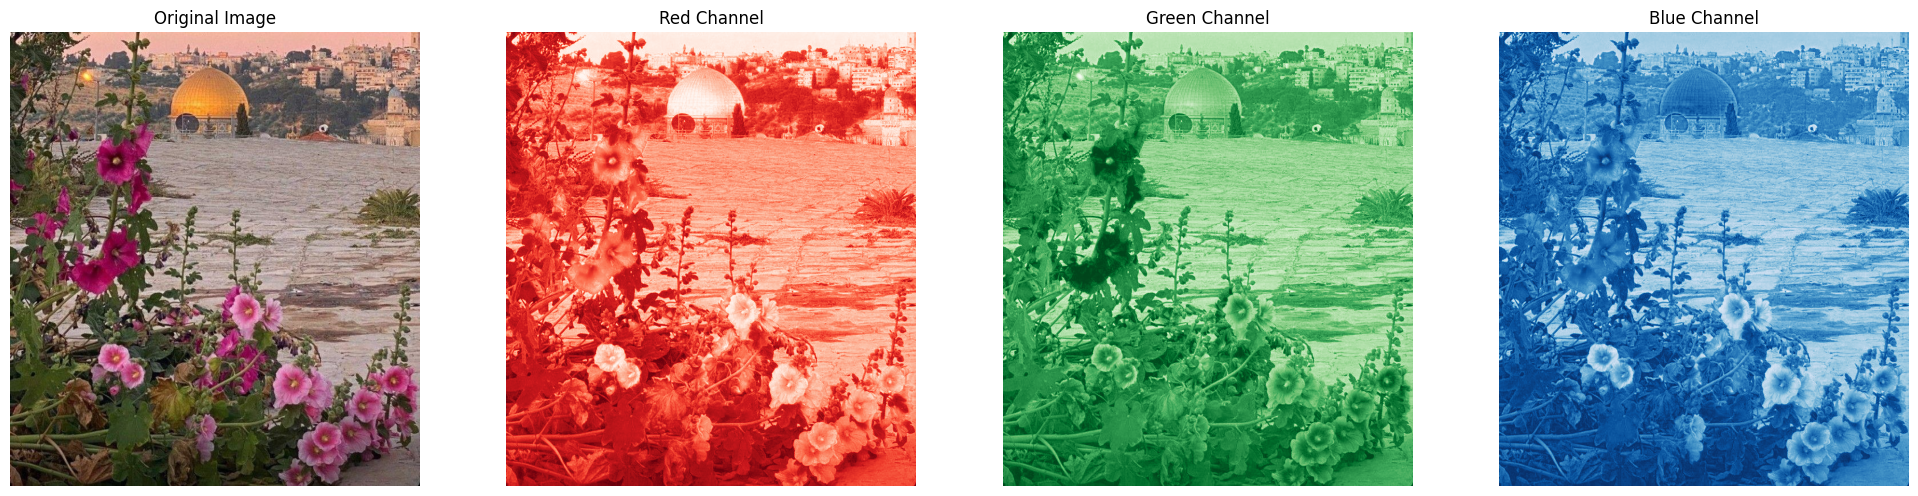

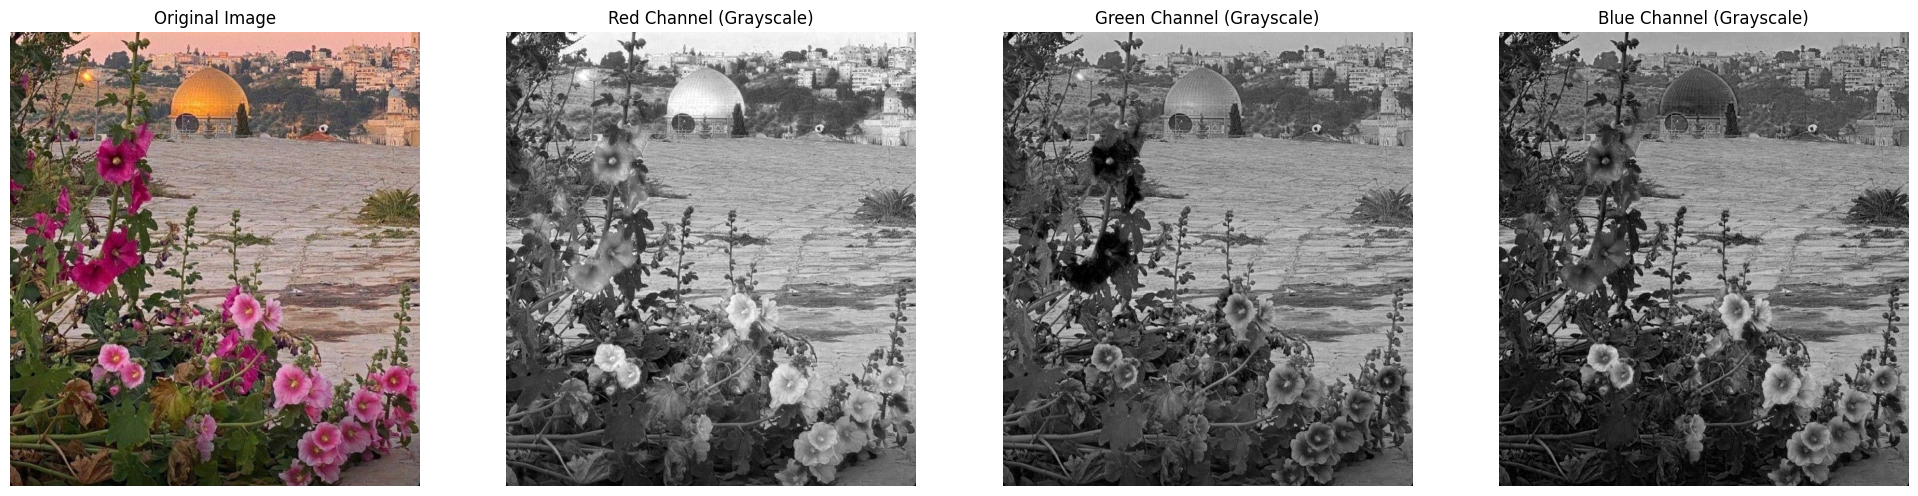

In [26]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
# 8. Plotting individual color channels
image = cv2.imread('/content/photo_5913455340324765398_y.jpg')
# Split the image into its three color channels

b, g, r = cv2.split(image)

# Create a figure with subplots for each channel and the original image
plt.figure(figsize=(20, 5))

# Original RGB image
plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Red channel
plt.subplot(142)
plt.imshow(r, cmap='Reds_r')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(143)
plt.imshow(g, cmap='Greens_r')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(144)
plt.imshow(b, cmap='Blues_r')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, you can also display the channels as grayscale images
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(r, cmap='gray')
plt.title('Red Channel (Grayscale)')
plt.axis('off')

plt.subplot(143)
plt.imshow(g, cmap='gray')
plt.title('Green Channel (Grayscale)')
plt.axis('off')

plt.subplot(144)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel (Grayscale)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 9. Implementing Convolution

In this exercise, you'll implement a convolution operation on images. Follow these steps to create a `Convolution` class and use it to apply edge detection and Gaussian blur filters.

## Task: Implement the Convolution Class

Create a `Convolution` class with the following structure:

```python
import numpy as np

        # Initialize the convolution with a kernel and padding option
        # Hint: You may want to store the kernel and padding as instance variables
       
       

class Convolution:
    def __init__(self, kernel, padding=False):
        self.kernel = np.array(kernel)
        self.padding = padding

    def convolve(self, image):
        kernel_height, kernel_width = self.kernel.shape
        image_height, image_width = image.shape

        # Padding
        if self.padding:
            pad_height = kernel_height // 2
            pad_width = kernel_width // 2
            image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
            image_height, image_width = image.shape

        output_image = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))

        for i in range(output_image.shape[0]):
            for j in range(output_image.shape[1]):
                patch = image[i:i+kernel_height, j:j+kernel_width]
                output_image[i, j] = np.sum(patch * self.kernel)

        return output_image


# Example usage:
conv = Convolution(kernel, padding=True)
result = conv.convolve(image)
```

## Task: Create Edge Detection and Gaussian Blur Filters

After implementing the `Convolution` class, create two instances:

1. Edge Detection Filter:
   Use a Sobel filter for edge detection. You can use the following kernel:
   ```python
   edge_kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]])
   ```

2. Gaussian Blur Filter:
   Create a 5x5 Gaussian kernel. You can use the following approximation:
   ```python
   gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                               [4, 16, 24, 16, 4],
                               [6, 24, 36, 24, 6],
                               [4, 16, 24, 16, 4],
                               [1,  4,  6,  4, 1]]) / 256
   ```

## Task: Apply Filters and Plot Results

Apply both filters to an image and plot the results. Use matplotlib to display the original image alongside the filtered images.

Good luck! Once you've completed the implementation, you can run the cell below to test your convolution class with the edge detection and Gaussian blur filters.

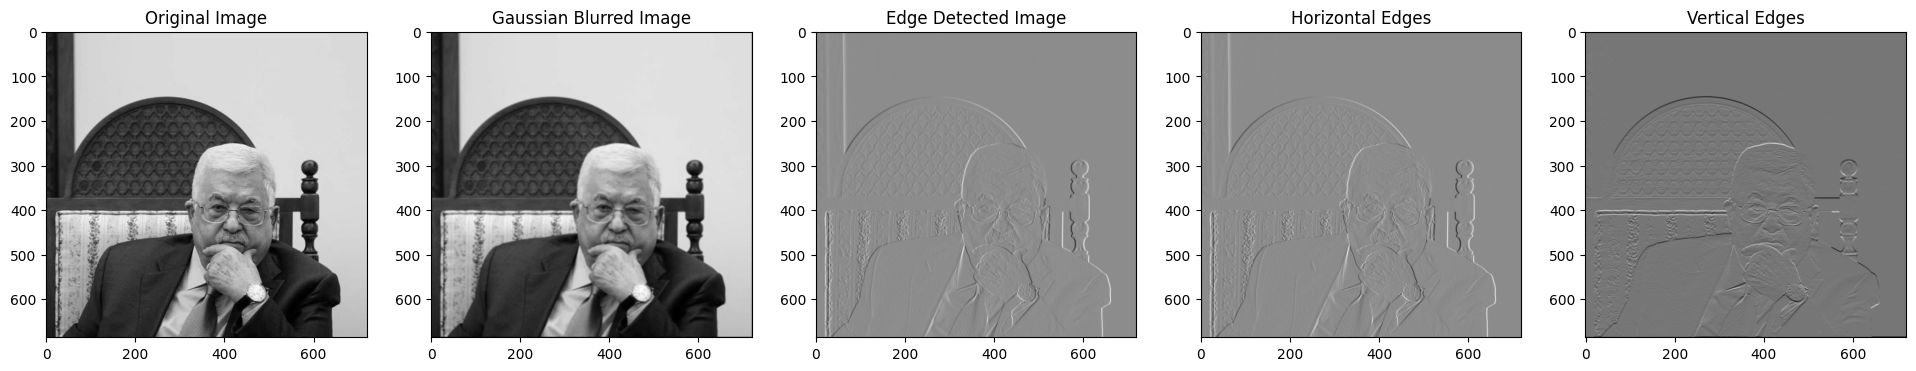

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
class Convolution:
    def __init__(self, kernel, padding=False):
        self.kernel = np.array(kernel)
        self.padding = padding

    def convolve(self, image):
        kernel_height, kernel_width = self.kernel.shape
        image_height, image_width = image.shape

        # Padding
        if self.padding:
            pad_height = kernel_height // 2
            pad_width = kernel_width // 2
            image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
            image_height, image_width = image.shape

        output_image = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))

        for i in range(output_image.shape[0]):
            for j in range(output_image.shape[1]):
                patch = image[i:i+kernel_height, j:j+kernel_width]
                output_image[i, j] = np.sum(patch * self.kernel)

        return output_image

# Edge Detection Filter
edge_kernel = np.array([[-1, 0, 1],
                       [-2,  0, 2],
                       [-1, 0, 1]])

# Gaussian Blur Filter
gaussian_kernel = np.array([[1,  4,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1,  4,  6,  4, 1]]) / 256


# Horizontal and Vertical Edge Detection Kernels
horizontal_kernel = np.array([[-1, 0, 1]])
vertical_kernel = np.array([[-1],
                           [0],
                           [1]])
# Load an image
image = cv2.imread('/content/test.jpg')    # Load as grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



# Create convolution objects for horizontal and vertical edges
horizontal_edge_detector = Convolution(horizontal_kernel, padding=True)
vertical_edge_detector = Convolution(vertical_kernel, padding=True)

# Apply filters
horizontal_edges = horizontal_edge_detector.convolve(image)
vertical_edges = vertical_edge_detector.convolve(image)

# Create convolution objects
edge_detector = Convolution(edge_kernel, padding=True)
gaussian_blur = Convolution(gaussian_kernel, padding=True)

# Apply filters
edge_image = edge_detector.convolve(image)
blurred_image = gaussian_blur.convolve(image)

# Plot images
plt.figure(figsize=(24, 4))
plt.subplot(151), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(152), plt.imshow(blurred_image, cmap='gray'), plt.title('Gaussian Blurred Image')
plt.subplot(153), plt.imshow(edge_image, cmap='gray'), plt.title('Edge Detected Image')
plt.subplot(154), plt.imshow(horizontal_edges, cmap='gray'), plt.title('Horizontal Edges')
plt.subplot(155), plt.imshow(vertical_edges, cmap='gray'), plt.title('Vertical Edges')
plt.show()
